In [1]:
#Setup for receiving other modules
import sys;

mathematics_source_path="/home/mkr/mathematics/"
sys.path.insert(0, mathematics_source_path + 'source')
sys.path = list(set(sys.path))

In [2]:
# Demonstration of Sampling Importance Resampling (SIR)
from sage.symbolic.integration.integral import definite_integral
from sage.symbolic.integration.integral import indefinite_integral
import numpy as np
import montecarlo.estimator as monte
import montecarlo.average_sample as mas
from numpy.random import choice

In [3]:
# Define variables
var('x,y')

(x, y)

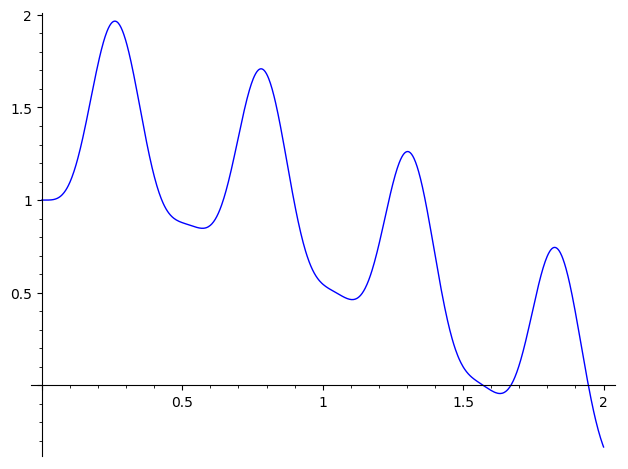

In [4]:
# Define the function we are going to integrate
f=cos(x)+(sin(6*x))^4

domainF_Start=0
domainF_End=2
domainF_Size=domainF_End-domainF_Start

plot(f,x,domainF_Start,domainF_End)

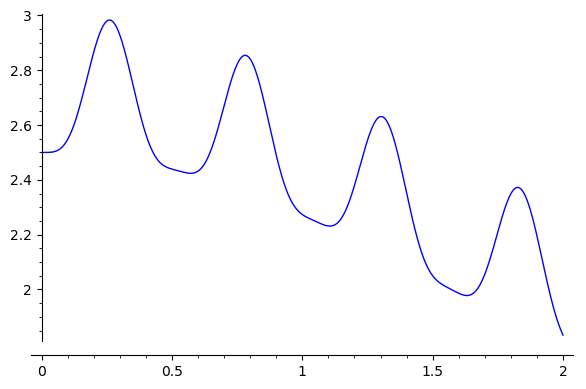

In [5]:
# Define the hard to sample probability function
g=(cos(x)+(sin(6*x))^4) * 0.5 + 2
plot(g,x,domainF_Start,domainF_End)

('PDF', x |--> -0.166666666666667*x + 2/3)
('PDF integrates to', 1.0)


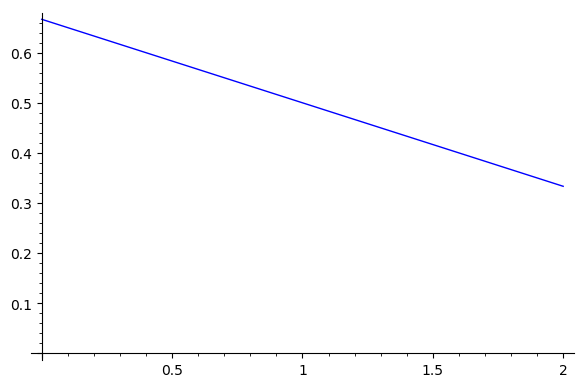

In [6]:
# Define a simple Probability Density Function (PDF)
# The PDF should be treated as 0 outside of domainF
# NOTE: extension(0) adds two pieces, x=0 in (-inf,domainF_Start) and x=0 in (domainF_End,+inf)
#pdf(x)=SR(1/domainF_Size)
pdf(x)= (-x * 0.5+2) / 3

print("PDF", pdf)
print("PDF integrates to", pdf.integral(x, domainF_Start, domainF_End))

plot(pdf,x,domainF_Start,domainF_End, ymin=0)

('CDF', x |--> -0.08333333333333333*x^2 + 2/3*x)
('PinY', -0.08333333333333333*x^2 + 2/3*x)
('P', -2*sqrt(-3*x + 4) + 4)


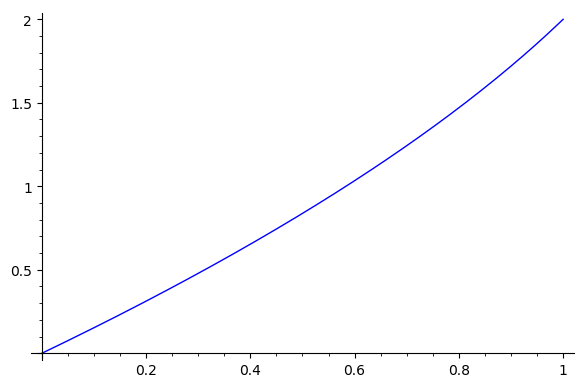

In [7]:
# Define the Probability function P from the PDF through CDF Inversion
cdf=pdf.integral(x)
PinY = cdf(x) - cdf(domainF_Start)
P = solve(x == PinY(y), y)[0].rhs()
print("CDF", cdf)
print("PinY", PinY)
print("P", P)
plot(P,x,0,1)

In [40]:
# Define the function names according to the paper
# f 
# g
p = pdf

# Draw M samples from the source distribution
samplesCountM = 1000
samplesX = [P(random()) for i in range(samplesCountM)]

# Compute a weight for each sample
samplesWeights = [g(Xi) / p(Xi) for Xi in samplesX]
samplesWeightsNormalizationFactor = sum(weight for weight in samplesWeights)
samplesWeights = [weight / samplesWeightsNormalizationFactor for weight in samplesWeights]

# Draw N samples from X according to the weights
samplesCountN = 500
samplesY = choice(samplesX, samplesCountN, p = samplesWeights)

# Run the estimator
WStar = (1/samplesCountM) * samplesWeightsNormalizationFactor
E = (1/samplesCountN) * sum(f(Yi)/g(Yi) for Yi in samplesY) * WStar

# Results
MonteE = monte.Estimator(lambda : f(random() * domainF_Size + domainF_Start), domainF_Start, domainF_End, 20000).integrate()
print("Monte", MonteE)
print("SIR", E)
print("Truth", definite_integral(f,x,domainF_Start,domainF_End))

('Monte', 1.68437773645737)
('SIR', 1.68198263651296)
('Truth', 1/192*sin(48) - 1/24*sin(24) + sin(2) + 3/4)
